In [1]:
%load_ext autoreload
%matplotlib widget
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_color_value,
    reconstruct_image_from_general,
    plot_full,
    find_nearest_edge,
)
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    get_width_info,
    get_width_info_new,
)
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
)
import pandas as pd
from amftrack.pipeline.functions.spore_processing.spore_id import make_spore_data
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    resolve_anastomosis_crossing_by_root,
)
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
    Edge,
    Hyphae,
)
from datetime import datetime
from matplotlib import cm
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from IPython.display import clear_output

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2023-03-10 11:36:19.103862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 11:36:19.614337: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/home2/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/cv2/../../lib64:
2023-03-10 11:36:19.614375: I tensorflow/stream_executor/cuda/cudart_stub.cc:29

In [2]:
plates = [
    "799_20211001",
    "803_20211012",
    "809_20211012",
    "907_20220321",
    "943_20220322",
    "403_20221005",
    "408_20221013",
    "88_20210915",
    "790_20210907",
    "69_20201119",
    "94_20201123",
    "59_20201126",
]

In [3]:
directory_targ = directory_project
# directory_targ = os.path.join(directory_scratch, "stitch_temp2") + "/"

In [7]:
directory_targ

'/projects/0/einf914/data/'

In [4]:
update_analysis_info(directory_targ)
analysis_info = get_analysis_info(directory_targ)
analysis_folders = analysis_info.loc[analysis_info["unique_id"].isin(plates)]
update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/3345 [00:00<?, ?it/s]

In [6]:
csvs = {
    "201209_Plate40.csv": "20201209_0926_Plate40",
    "201210_Plate39.csv": "20201210_1156_Plate39",
    "201210_Plate40.csv": "20201209_0926_Plate40",
    "201217_Plate09.csv": "20201217_0835_Plate09",
    "201217_Plate10.csv": "20201217_0839_Plate10",
    "201217_Plate38.csv": "20201217_1350_Plate38",
    "211012_Plate799.csv": "20211012_0827_Plate39",
    "211016_Plate809.csv": "20211016_0954_Plate37",
    "211016_Plate803.csv": "20211016_0939_Plate33",
    "211016_Plate799.csv": "20211016_1002_Plate39",
    "211015_Plate809.csv": "20211015_0751_Plate37",
    "211015_Plate803.csv": "20211015_0736_Plate33",
    "211015_Plate799.csv": "20211015_0758_Plate39",
    "211014_Plate809.csv": "20211014_0836_Plate37",
    "211013_Plate809.csv": "20211013_1056_Plate37",
    "211014_Plate803.csv": "20211014_0821_Plate33",
    "211014_Plate799.csv": "20211014_0843_Plate39",
    "211013_Plate799.csv": "20211013_0819_Plate39",
    "211013_Plate803.csv": "20211013_0830_Plate33",
    "211012_Plate803.csv": "20211012_1012_Plate33",
}

In [12]:
csvs = {
    # "201209_Plate40.csv" : "20201209_0926_Plate40",
    # "201210_Plate39.csv" :"20201210_1156_Plate39",
    # "201210_Plate40.csv" : "20201209_0926_Plate40",
    "201217_Plate09.csv": "20201217_0835_Plate09",
    "201217_Plate10.csv": "20201217_0839_Plate10",
    # "201217_Plate38.csv" : "20201217_1350_Plate38",
    "211012_Plate799.csv": "20211012_0827_Plate39",
    "211016_Plate809.csv": "20211016_0954_Plate37",
    "211016_Plate803.csv": "20211016_0939_Plate33",
    "211016_Plate799.csv": "20211016_1002_Plate39",
    # "211015_Plate809.csv" : "20211015_0751_Plate37",
    # "211015_Plate803.csv" : "20211015_0736_Plate33",
    "211015_Plate799.csv": "20211015_0758_Plate39",
    # "211014_Plate809.csv" : "20211014_0836_Plate37",
    # "211013_Plate809.csv" : "20211013_1056_Plate37",
    "211014_Plate803.csv": "20211014_0821_Plate33",
    "211014_Plate799.csv": "20211014_0843_Plate39",
    # "211013_Plate799.csv" : "20211013_0819_Plate39",
    "211013_Plate803.csv": "20211013_0830_Plate33",
    # "211012_Plate803.csv" : "20211012_1012_Plate33"
}

In [5]:
csvs_bet = {
    # "211012_Plate799.csv" : "20211012_0827_Plate39",
    # "211014_Plate809.csv" : "20211014_0836_Plate37",
    # "201217_Plate09.csv" : "20201217_0835_Plate09",
    # "201217_Plate10.csv" :"20201217_0839_Plate10",
    # "201217_Plate38.csv" : "20201217_1350_Plate38",
    # "211013_Plate799.csv" : "20211013_0819_Plate39",
    "211012_Plate803.csv": "20211012_1012_Plate33",
    "211013_Plate809.csv": "20211013_1056_Plate37",
}

2020-12-17 08:35:00


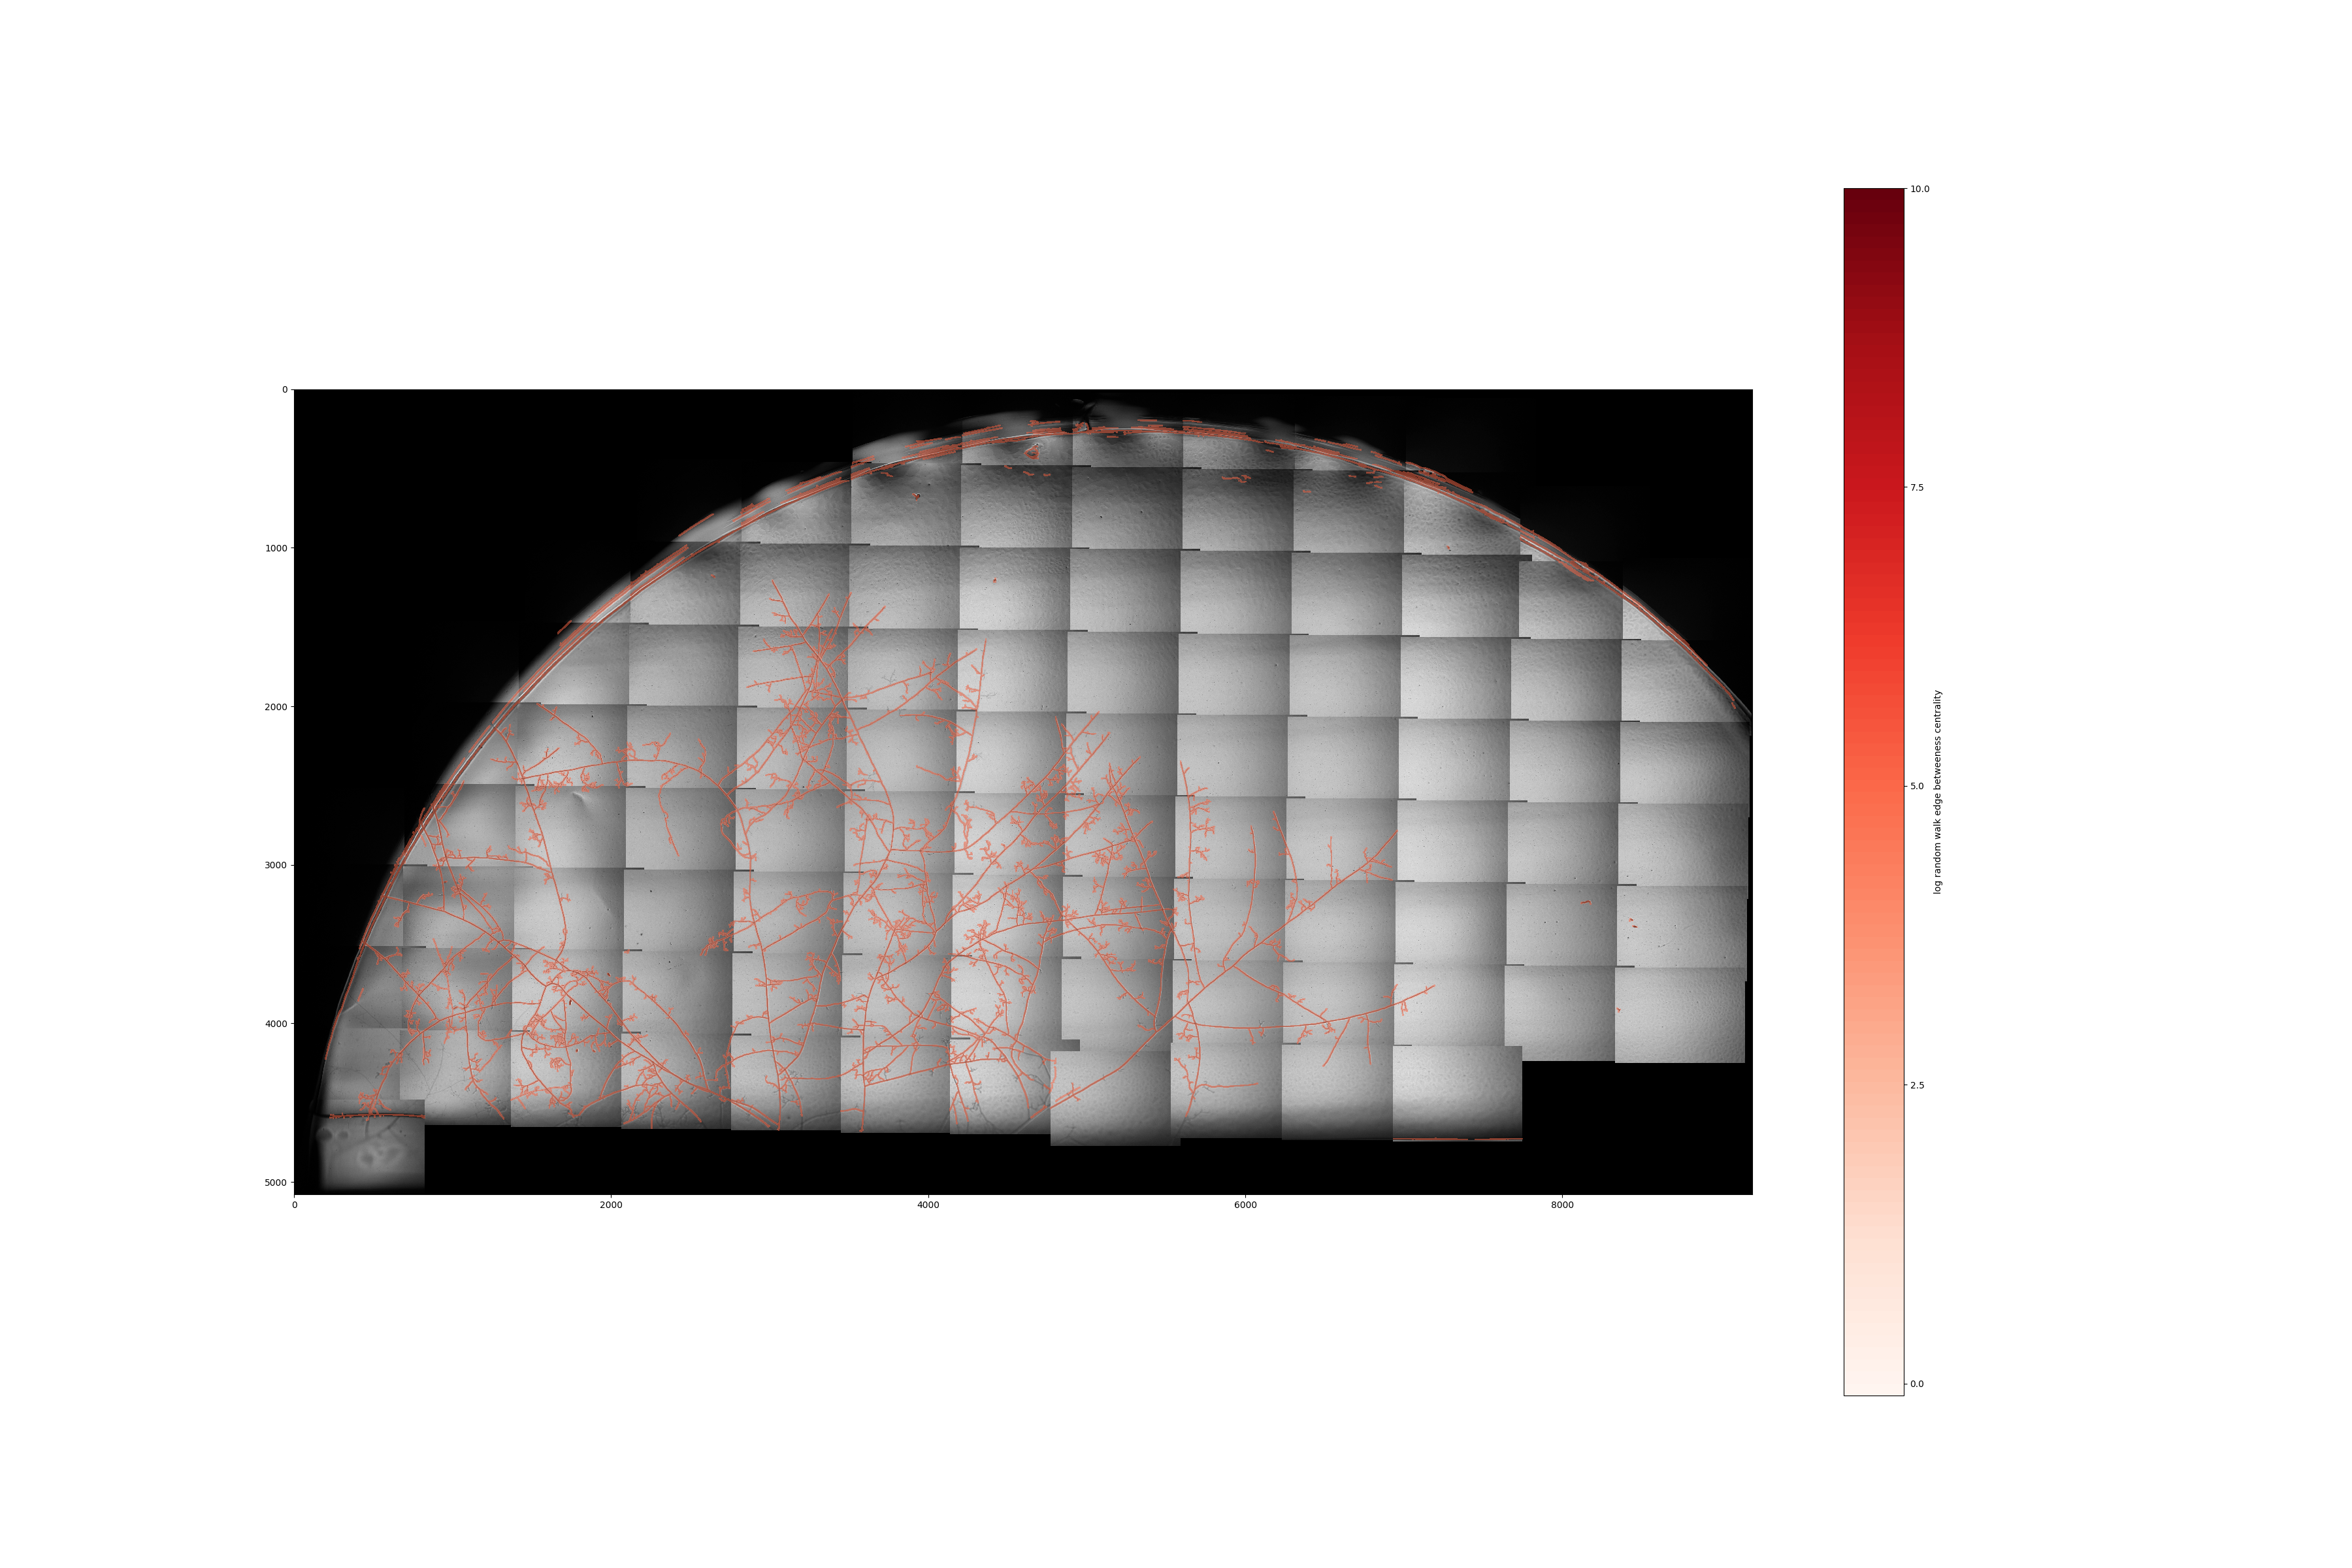

In [23]:
csvs = {
    "201217_Plate09.csv": "20201217_0835_Plate09",
}
for csv in csvs.keys():
    plt.close("all")
    path = r"/scratch-shared/amftrack/transport/csv/"
    file = csv
    total_path = os.path.join(path, file)
    table = pd.read_csv(
        total_path, names=["kymo_id", "video_id", "posx", "posy", "speed+", "speed-"]
    )
    sub = table.groupby("video_id").mean()
    sub = sub.replace(np.nan, 0)
    name = file.split(".")[0]
    unique_id = all_folders.loc[all_folders["folder"] == csvs[file]]["unique_id"].iloc[
        0
    ]
    plates = [unique_id]
    folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
    folders = folders.sort_values(by="datetime")
    # select = folders.loc[folders['folder']>=csvs[file]]
    #     select_exp = folders.loc[folders['folder']>=csvs[file]]

    #     select_exp = select_exp.loc[select_exp['/Analysis/nx_graph_pruned_labeled.p']].iloc[:2]
    select_exp = folders.loc[folders["folder"] <= csvs[file]]

    select_exp = select_exp.loc[select_exp["/Analysis/nx_graph_pruned_labeled.p"]].iloc[
        -2:
    ]
    exp = Experiment(directory_targ)
    exp.load(select_exp)
    exp.dates.sort()
    t = len(select_exp) - 1
    exp.load_tile_information(t)
    spore_datatable = make_spore_data(exp)
    spore_datatable = spore_datatable.loc[spore_datatable["t"] == t]
    vmax = 0
    vmin = 10
    ax = plot_edge_color_value(
        exp,
        t,
        lambda edge: 5,
        cmap=cm.get_cmap("Reds", 100),
        v_min=vmin,
        v_max=vmax,
        plot_cmap=True,
        show_background=True,
        dilation=10,
        label_colorbar="log random walk edge betweeness centrality",
    )

In [22]:
file = "201217_Plate38.csv"
plates = ["599_20201217"]
folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
folders = folders.sort_values(by="datetime")
select = folders.loc[folders["folder"] >= csvs[file]]
select

total_path Plate PrincePos  \
126   /projects/0/einf914/data/20201217_1350_Plate38   599        38   
356   /projects/0/einf914/data/20201217_2012_Plate38   599        38   
625   /projects/0/einf914/data/20201218_0011_Plate38   599        38   
725   /projects/0/einf914/data/20201218_0410_Plate38   599        38   
795   /projects/0/einf914/data/20201218_0811_Plate38   599        38   
1607  /projects/0/einf914/data/20201218_1210_Plate38   599        38   
1480  /projects/0/einf914/data/20201218_1610_Plate38   599        38   
1575  /projects/0/einf914/data/20201218_2009_Plate38   599        38   

          root strain      medium split Pbait CrossDate Temperature  ...  \
126   'Carrot'   'A5'  '001P100N'   'Y'   '-'  20201217         NaN  ...   
356   'Carrot'   'A5'  '001P100N'   'Y'   '-'  20201217         NaN  ...   
625   'Carrot'   'A5'  '001P100N'   'Y'   '-'  20201217         NaN  ...   
725   'Carrot'   'A5'  '001P100N'   'Y'   '-'  20201217         NaN  ...   
795   'Carrot'   'A5'  '001P100N'   'Y'   '-'  20201217         NaN  ...   
1607  'Carrot'   'A5'  '001P100N'   'Y'   '-'  20201217         NaN  ...   
1480  'Carrot'   'A5'  '001P100N'   'Y'   '-'  20201217         NaN  ...   
1575  'Carrot'   'A5'  '001P100N'   'Y'   '-'  20201217         NaN  ...   

     /Analysis/transform_corrupt.mat  \
126                             True   
356                            False   
625                            False   
725                            False   
795                            False   
1607                           False   
1480                           False   
1575                           False   

     /Analysis/skeleton_realigned_compressed.mat /Analysis/nx_graph_pruned.p  \
126                                         True                        True   
356                                         True                        True   
625                                         True                        True   
725                                         True                        True   
795                                         True                        True   
1607                                        True                        True   
1480                                        True                        True   
1575                                        True                        True   

     /Analysis/nx_graph_pruned_width.p /Analysis/nx_graph_pruned_labeled.p  \
126                               True                                True   
356                               True                                True   
625                               True                                True   
725                               True                                True   
795                               True                                True   
1607                              True                                True   
1480                              True                                True   
1575                              True                                True   

                    date                 folder Temp     unique_id  \
126   17.12.2020, 13:50:  20201217_1350_Plate38  NaN  599_20201217   
356   17.12.2020, 20:12:  20201217_2012_Plate38  NaN  599_20201217   
625   18.12.2020, 00:11:  20201218_0011_Plate38  NaN  599_20201217   
725   18.12.2020, 04:10:  20201218_0410_Plate38  NaN  599_20201217   
795   18.12.2020, 08:11:  20201218_0811_Plate38  NaN  599_20201217   
1607  18.12.2020, 12:10:  20201218_1210_Plate38  NaN  599_20201217   
1480  18.12.2020, 16:10:  20201218_1610_Plate38  NaN  599_20201217   
1575  18.12.2020, 20:09:  20201218_2009_Plate38  NaN  599_20201217   

                datetime  
126  2020-12-17 13:50:00  
356  2020-12-17 20:12:00  
625  2020-12-18 00:11:00  
725  2020-12-18 04:10:00  
795  2020-12-18 08:11:00  
1607 2020-12-18 12:10:00  
1480 2020-12-18 16:10:00  
1575 2020-12-18 20:09:00  

[8 rows x 25 columns]

In [6]:
for csv in csvs.keys():
    plt.close("all")
    path = r"/scratch-shared/amftrack/transport/csv/"
    file = csv
    total_path = os.path.join(path, file)
    table = pd.read_csv(
        total_path, names=["kymo_id", "video_id", "posx", "posy", "speed+", "speed-"]
    )
    sub = table.groupby("video_id").mean()
    sub = sub.replace(np.nan, 0)
    name = file.split(".")[0]
    unique_id = all_folders.loc[all_folders["folder"] == csvs[file]]["unique_id"].iloc[
        0
    ]
    plates = [unique_id]
    print(unique_id)

139_20201214
40_20201214
599_20201217
799_20211001
799_20211001
809_20211012
803_20211012
799_20211001
809_20211012
809_20211012
799_20211001
799_20211001
803_20211012


In [36]:
for csv in csvs.keys():
    plt.close("all")
    path = r"/scratch-shared/amftrack/transport/csv/"
    file = csv
    total_path = os.path.join(path, file)
    table = pd.read_csv(
        total_path, names=["kymo_id", "video_id", "posx", "posy", "speed+", "speed-"]
    )
    sub = table.groupby("video_id").mean()
    sub = sub.replace(np.nan, 0)
    name = file.split(".")[0]
    unique_id = all_folders.loc[all_folders["folder"] == csvs[file]]["unique_id"].iloc[
        0
    ]
    plates = [unique_id]
    folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
    folders = folders.sort_values(by="datetime")
    exp = Experiment(directory_targ)
    exp.load_light(folders)
    exp.dates.sort()
    for t in range(len(folders)):
        exp.load_tile_information(t)
    spore_datatable = make_spore_data(exp)
    spore_datatable["unique_id"] = unique_id
    select = all_folders.loc[all_folders["folder"] == csvs[file]]
    crossdate = str(int(str(select["CrossDate"].iloc[0]).replace("'", "")))
    if unique_id == "799_20211001":
        crossdate = "20211006"
    datetime_cross = datetime(
        year=int(crossdate[0:4]), month=int(crossdate[4:6]), day=int(crossdate[6:8])
    )

    spore_datatable["time_since_crossing"] = (
        spore_datatable["datetime"] - datetime_cross
    )
    path = r"/scratch-shared/amftrack/transport/csv_spores/"
    total_path = os.path.join(path, file)
    spore_datatable.to_csv(total_path)

In [52]:
select

total_path Plate PrincePos      root  \
247  /projects/0/einf914/data/20201217_0839_Plate10    40        10  'Carrot'   

    strain      medium split Pbait CrossDate Temperature  ...  \
247   'A5'  '001P100N'   'Y'   '-'  20201214         NaN  ...   

    /Analysis/transform_corrupt.mat  \
247                            True   

    /Analysis/skeleton_realigned_compressed.mat /Analysis/nx_graph_pruned.p  \
247                                        True                        True   

    /Analysis/nx_graph_pruned_width.p /Analysis/nx_graph_pruned_labeled.p  \
247                              True                                True   

                   date                 folder Temp    unique_id  \
247  17.12.2020, 08:39:  20201217_0839_Plate10   25  40_20201214   

               datetime  
247 2020-12-17 08:39:00  

[1 rows x 25 columns]

In [16]:
for csv in csvs.keys():
    if csv not in csvs_bet.keys():
        print(csv)
        plt.close("all")
        path = r"/scratch-shared/amftrack/transport/csv/"
        file = csv
        total_path = os.path.join(path, file)
        table = pd.read_csv(
            total_path,
            names=["kymo_id", "video_id", "posx", "posy", "speed+", "speed-"],
        )
        sub = table.groupby("video_id").mean()
        sub = sub.replace(np.nan, 0)
        name = file.split(".")[0]
        unique_id = all_folders.loc[all_folders["folder"] == csvs[file]][
            "unique_id"
        ].iloc[0]
        plates = [unique_id]
        folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
        folders = folders.sort_values(by="datetime")
        # select = folders.loc[folders['folder']>=csvs[file]]
        #     select_exp = folders.loc[folders['folder']>=csvs[file]]

        #     select_exp = select_exp.loc[select_exp['/Analysis/nx_graph_pruned_labeled.p']].iloc[:2]
        select_exp = folders.loc[folders["folder"] <= csvs[file]]

        select_exp = select_exp.loc[
            select_exp["/Analysis/nx_graph_pruned_labeled.p"]
        ].iloc[-2:]
        exp = Experiment(directory_targ)
        exp.load(select_exp)
        exp.dates.sort()
        t = len(select_exp) - 1
        exp.load_tile_information(t)
        spore_datatable = make_spore_data(exp)
        spore_datatable = spore_datatable.loc[spore_datatable["t"] == t]
        # ax = plot_full(exp,t,figsize=(24, 16),dilation=4)
        vmax = -2.5
        vmin = -4.5
        #     ax = plot_edge_color_value(exp,t,lambda edge : np.log10(edge.current_flow_betweeness(t)),cmap = cm.get_cmap("Reds", 100),v_min =vmin,v_max = vmax,plot_cmap=True,show_background=True,dilation =10,label_colorbar = "log random walk edge betweeness centrality")
        #     dpi=400
        #     cmap=cm.get_cmap("Reds", 100)
        #     speed_max = 20

        #     ax.scatter(spore_datatable['y']/5,spore_datatable['x']/5,s = 10,color = 'blue',alpha = 0.2)

        #     for index,row in sub.iterrows():
        #         pos = exp.timestep_to_general((5*row['posy'],5*row['posx']),0)/5
        #         ax.scatter(pos[1],pos[0],s = 10,color = cmap(abs(row['speed-'])/speed_max))
        #         ax.text(pos[1],pos[0],round(row['speed-']),size = 2)
        #     path = r"/scratch-shared/amftrack/transport/full_picture/"
        #     file_name = f'{name}_betweenness.png'
        #     save_path = os.path.join(path,file_name)
        #     plt.savefig(save_path, dpi=dpi)
        #     ax = plot_full(exp,t,figsize=(24, 16),dilation=4)
        #     ax.scatter(spore_datatable['y']/5,spore_datatable['x']/5,s = 10,color = 'blue',alpha = 0.2)

        #     for index,row in sub.iterrows():
        #         pos = exp.timestep_to_general((5*row['posy'],5*row['posx']),0)/5
        #         ax.scatter(pos[1],pos[0],s = 10,color = cmap(abs(row['speed+'])/speed_max))

        #         ax.text(pos[1],pos[0],round(row['speed+']),size = 2)
        #     path = r"/scratch-shared/amftrack/transport/full_picture/"
        #     file_name = f'{name}+.png'
        #     save_path = os.path.join(path,file_name)
        #     plt.savefig(save_path, dpi=dpi)

        if select_exp["folder"].iloc[-1] == csvs[file]:
            table = get_spore_volume_loc(table, exp, t)
            table = get_spore_volume_loc(table, exp, size=1000, t=t)
            table = get_spore_volume_loc(table, exp, size=500, t=t)
            table = get_spore_num_loc(table, exp, t=t)
            table = get_spore_num_loc(table, exp, size=1000, t=t)
            table = get_spore_num_loc(table, exp, size=500, t=t)
            table = get_spore_distance_loc(table, exp, t=t)
        table = get_length_study_zone(table, exp)
        select = all_folders.loc[all_folders["folder"] == csvs[file]]
        crossdate = str(int(str(select["CrossDate"].iloc[0]).replace("'", "")))
        if unique_id == "799_20211001":
            crossdate = "20211006"
        datetime_cross = datetime(
            year=int(crossdate[0:4]), month=int(crossdate[4:6]), day=int(crossdate[6:8])
        )

        table["time_since_crossing"] = (select["datetime"] - datetime_cross).iloc[0]
        if (
            abs((select["datetime"] - datetime_cross).iloc[0] / pd.Timedelta(days=1))
            > 300
        ):
            print(unique_id, csvs[file])
            break
        table["folder"] = csvs[file]
        table["unique_id"] = unique_id
        table["tot_num_spore"] = len(spore_datatable)

        #     table['tot_num_spore']=len(spore_datatable)
        path = r"/scratch-shared/amftrack/transport/csv_new/"
        total_path = os.path.join(path, file)
        table.to_csv(total_path)
        clear_output()

NameError: name 'csvs' is not defined

In [21]:
unique_id

'139_20201214'

In [8]:
for csv in csvs_bet.keys():
    plt.close("all")
    path = r"/scratch-shared/amftrack/transport/csv/"
    file = csv
    total_path = os.path.join(path, file)
    table = pd.read_csv(
        total_path, names=["kymo_id", "video_id", "posx", "posy", "speed+", "speed-"]
    )
    sub = table.groupby("video_id").mean()
    sub = sub.replace(np.nan, 0)
    name = file.split(".")[0]
    unique_id = all_folders.loc[all_folders["folder"] == csvs_bet[file]][
        "unique_id"
    ].iloc[0]
    print(unique_id)
    plates = [unique_id]
    folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
    folders = folders.sort_values(by="datetime")
    # select = folders.loc[folders['folder']>=csvs[file]]
    #     select_exp = folders.loc[folders['folder']>=csvs[file]]

    #     select_exp = select_exp.loc[select_exp['/Analysis/nx_graph_pruned_labeled.p']].iloc[:2]
    select_exp = folders.loc[folders["folder"] <= csvs_bet[file]]

    select_exp = select_exp.loc[select_exp["/Analysis/nx_graph_pruned_labeled.p"]].iloc[
        -2:
    ]
    exp = Experiment(directory_targ)
    exp.load(select_exp)
    exp.dates.sort()
    t = len(select_exp) - 1
    exp.load_tile_information(t)
    load_graphs(exp, directory_targ)
    exp.save_location = ""

    load_study_zone(exp)

    spore_datatable = make_spore_data(exp)
    spore_datatable = spore_datatable.loc[spore_datatable["t"] == t]
    # ax = plot_full(exp,t,figsize=(24, 16),dilation=4)
    vmax = -2.5
    vmin = -4.5
    try:
        ax = plot_edge_color_value(
            exp,
            t,
            lambda edge: np.log10(edge.current_flow_betweeness(t)),
            cmap=cm.get_cmap("viridis", 100),
            v_min=vmin,
            v_max=vmax,
            plot_cmap=True,
            show_background=True,
            dilation=10,
            label_colorbar="log random walk edge betweeness centrality",
        )
        dpi = 400
        cmap = cm.get_cmap("cool", 100)
        speed_max = 20

        ax.scatter(
            spore_datatable["y"] / 5,
            spore_datatable["x"] / 5,
            s=10,
            color="blue",
            alpha=0.2,
        )

        for index, row in sub.iterrows():
            pos = exp.timestep_to_general((5 * row["posy"], 5 * row["posx"]), 0) / 5
            ax.scatter(pos[1], pos[0], s=10, color=cmap(abs(row["speed-"]) / speed_max))
            ax.text(pos[1], pos[0], round(row["speed-"]), size=2)
        path = r"/scratch-shared/amftrack/transport/full_picture/"
        file_name = f"{name}_betweenness.png"
        save_path = os.path.join(path, file_name)
        plt.savefig(save_path, dpi=dpi)
    except:
        print(unique_id)
    if select_exp["folder"].iloc[-1] == csvs_bet[file]:
        print("running")
        table = get_spore_volume_loc(table, exp, t)
        table = get_spore_volume_loc(table, exp, size=1000, t=t)
        table = get_spore_volume_loc(table, exp, size=500, t=t)
        table = get_spore_num_loc(table, exp, t=t)
        table = get_spore_num_loc(table, exp, size=1000, t=t)
        table = get_spore_num_loc(table, exp, size=500, t=t)
        table = get_spore_distance_loc(table, exp, t=t)
        table = get_betweenness_loc(table, exp, t=t)
        table = get_random_betweenness_loc(table, exp, t=t)
        mini, maxi = get_betweenness_max_min(exp, t)
        table["min_betweenness"] = mini
        table["max_betweenness"] = maxi
        mini, maxi = get_random_betweenness_max_min(exp, t)
        table["min_random_betweenness"] = mini
        table["max_random_betweenness"] = maxi
        table["normalized_random_betweenness"] = (
            table["random_betweenness"] - table["min_random_betweenness"]
        ) / (table["max_random_betweenness"] - table["min_random_betweenness"])
        table["normalized_betweenness"] = (
            table["betweenness"] - table["min_betweenness"]
        ) / (table["max_betweenness"] - table["min_betweenness"])

    table = get_length_study_zone(table, exp)
    select = all_folders.loc[all_folders["folder"] == csvs_bet[file]]
    crossdate = str(int(str(select["CrossDate"].iloc[0]).replace("'", "")))
    if unique_id == "799_20211001":
        crossdate = "20211006"
    datetime_cross = datetime(
        year=int(crossdate[0:4]), month=int(crossdate[4:6]), day=int(crossdate[6:8])
    )

    table["time_since_crossing"] = (select["datetime"] - datetime_cross).iloc[0]
    if abs((select["datetime"] - datetime_cross).iloc[0] / pd.Timedelta(days=1)) > 300:
        print(unique_id, csvs_bet[file])
        break
    table["folder"] = csvs_bet[file]
    table["unique_id"] = unique_id
    table["tot_num_spore"] = len(spore_datatable)

    #     table['tot_num_spore']=len(spore_datatable)
    path = r"/scratch-shared/amftrack/transport/csv_new/"
    total_path = os.path.join(path, file)
    table.to_csv(total_path)
    clear_output()

In [11]:
edges = [
    find_nearest_edge(
        exp.timestep_to_general((5 * row["posy"], 5 * row["posx"]), t), exp, t
    )
    for index, row in sub.iterrows()
]

In [18]:
[edge.current_flow_betweeness(t) for edge in edges]

[7.332809648912676e-05,
 0.00010999214472781602,
 0.0016704429650854272,
 0.0012249663256665682,
 0.0006829291951486103,
 0.0016703677268877105,
 1.8332024121782374e-05,
 1.833202412127734e-05,
 1.833202412127734e-05,
 0.001786798883704127,
 0.0007305592507489257,
 0.00019594062731994872,
 1.833202412127734e-05,
 0.001735258597847381,
 0.0019487763276087805,
 7.33280964852462e-05,
 0.0004524887981804249,
 0.0012326073989013147,
 0.0012326073989013147,
 0.0035951320966118947,
 0.0033438069436482775,
 0.0033438069436482775,
 0.0006398786079195123,
 0.0014826379008975776,
 0.004114266242322152,
 0.004074499659239092,
 0.0011316078053825258]

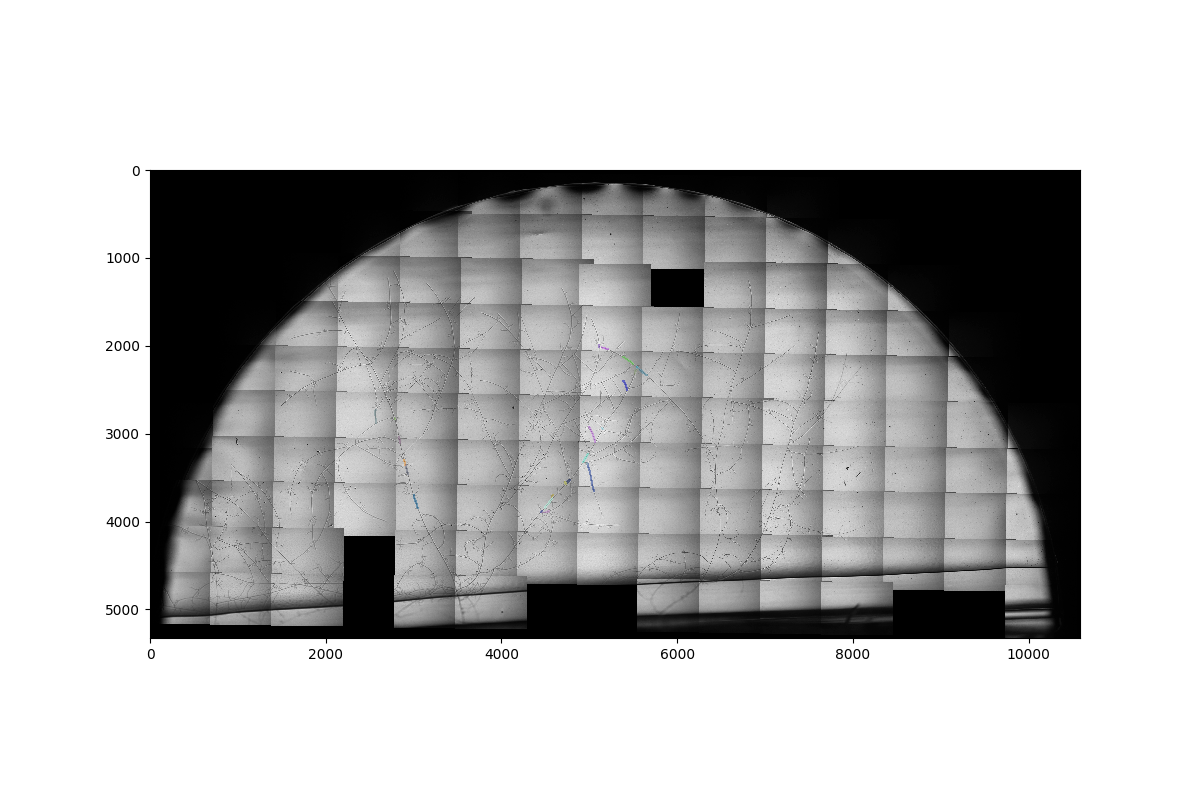

In [23]:
ax = plot_full(exp, t, edges=edges, dilation=20)

In [15]:
poss = [
    exp.timestep_to_general((5 * row["posy"], 5 * row["posx"]), 0)
    for index, row in table.iterrows()
]

In [6]:
def get_spore_volume_local(pos, spore_data, size=500):
    positions = np.array((spore_data["x"], spore_data["y"])).transpose()
    select = spore_data.loc[np.linalg.norm(positions - pos, axis=1) <= size]
    local_volume = np.sum(select["radius"] ** 3)
    return local_volume


def get_spore_number_local(pos, spore_data, size=500):
    positions = np.array((spore_data["x"], spore_data["y"])).transpose()
    select = spore_data.loc[np.linalg.norm(positions - pos, axis=1) <= size]
    local_num = len(select)
    return local_num


def get_closet_spore_distance(pos, spore_data):
    positions = np.array((spore_data["x"], spore_data["y"])).transpose()
    distances = np.linalg.norm(positions - pos, axis=1)
    return np.min(distances)


def get_random_betweenness(exp, pos, t):
    edge = find_nearest_edge(pos, exp, t)
    try:
        result = edge.current_flow_betweeness(t)
    except:
        result = None
    return result


def get_betweenness(exp, pos, t):
    edge = find_nearest_edge(pos, exp, t)
    try:
        result = edge.betweeness(t)
    except:
        result = None
    return result

In [7]:
def get_spore_volume_loc(table, exp, size=2000, t=0):
    poss = [
        exp.timestep_to_general((5 * row["posy"], 5 * row["posx"]), 0)
        for index, row in table.iterrows()
    ]
    spore_datatable = make_spore_data(exp)
    spore_datatable = spore_datatable.loc[spore_datatable["t"] == t]
    table[f"spore_density_{size}"] = [
        get_spore_volume_local(pos, spore_datatable, size) / size**2 for pos in poss
    ]
    return table


def get_spore_num_loc(table, exp, size=2000, t=0):
    poss = [
        exp.timestep_to_general((5 * row["posy"], 5 * row["posx"]), 0)
        for index, row in table.iterrows()
    ]
    spore_datatable = make_spore_data(exp)
    spore_datatable = spore_datatable.loc[spore_datatable["t"] == t]
    table[f"spore_density_num_{size}"] = [
        get_spore_number_local(pos, spore_datatable, size) for pos in poss
    ]
    return table


def get_spore_distance_loc(table, exp, t=0):
    poss = [
        exp.timestep_to_general((5 * row["posy"], 5 * row["posx"]), 0)
        for index, row in table.iterrows()
    ]
    spore_datatable = make_spore_data(exp)
    spore_datatable = spore_datatable.loc[spore_datatable["t"] == t]
    table[f"spore_distance"] = [
        get_closet_spore_distance(pos, spore_datatable) for pos in poss
    ]
    return table


def get_betweenness_loc(table, exp, t=0):
    poss = [
        exp.timestep_to_general((5 * row["posy"], 5 * row["posx"]), 0)
        for index, row in table.iterrows()
    ]
    table[f"betweenness"] = [get_betweenness(exp, pos, t) for pos in poss]
    return table


def get_random_betweenness_loc(table, exp, t=0):
    poss = [
        exp.timestep_to_general((5 * row["posy"], 5 * row["posx"]), 0)
        for index, row in table.iterrows()
    ]
    table[f"random_betweenness"] = [get_random_betweenness(exp, pos, t) for pos in poss]
    return table


def get_betweenness_max_min(exp, t=0):
    edges = get_all_edges(exp, t)
    betweenness = [edge.betweeness(t) for edge in edges if edge.betweeness(t) > 0]
    return (np.min(betweenness), np.max(betweenness))


def get_random_betweenness_max_min(exp, t=0):
    edges = get_all_edges(exp, t)
    betweenness = [
        edge.current_flow_betweeness(t)
        for edge in edges
        if edge.current_flow_betweeness(t) > 0
    ]
    return (np.min(betweenness), np.max(betweenness))


def get_length_study_zone(table, exp):
    length = 0
    exp.save_location = ""
    load_study_zone(exp)
    t = 0
    for edge in exp.nx_graph[t].edges:
        edge_obj = Edge(Node(edge[0], exp), Node(edge[1], exp), exp)
        is_in_end = np.all(is_in_study_zone(edge_obj.end, t, 1000, 150, is_circle))
        is_in_begin = np.all(is_in_study_zone(edge_obj.begin, t, 1000, 150, is_circle))
        if is_in_end and is_in_begin:
            length += measure_length_um_edge(edge_obj, t)
    table[f"tot_length"] = length

    return table

In [119]:
crossdate = str(int(str(select["CrossDate"].iloc[0]).replace("'", "")))

datetime_cross = datetime(
    year=int(crossdate[0:4]), month=int(crossdate[4:6]), day=int(crossdate[6:8])
)
table = get_spore_volume_loc(table, exp)
table = get_spore_volume_loc(table, exp, size=1000)
table = get_spore_volume_loc(table, exp, size=500)
table = get_spore_num_loc(table, exp)
table = get_spore_num_loc(table, exp, size=1000)
table = get_spore_num_loc(table, exp, size=500)
table["time_since_crossing"] = select["datetime"] - datetime_cross
table["tot_num_spore"] = len(spore_datatable)

In [124]:
path = r"/scratch-shared/amftrack/transport/csv_new/"
total_path = os.path.join(path, file)
table.to_csv(total_path)

In [121]:
total_path

'/scratch-shared/amftrack/transport/csv_new/201210_Plate40+.png'

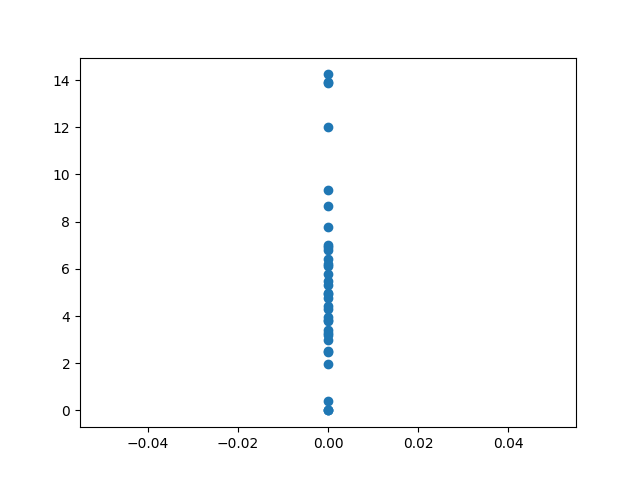

In [37]:
fig, ax = plt.subplots()
ax.scatter(table["spore_density_num_500"], table["speed+"])

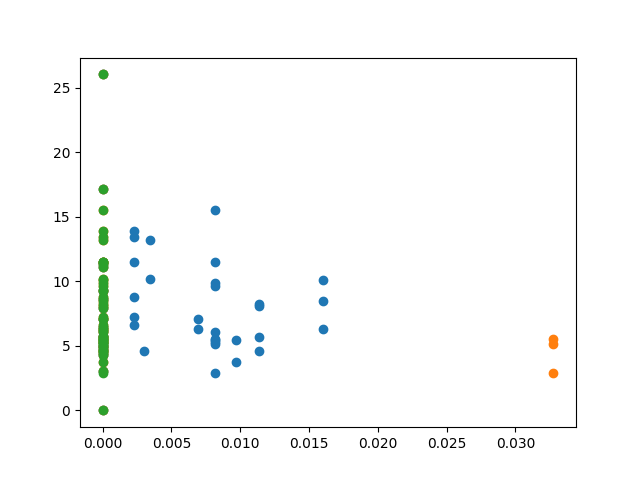

In [49]:
fig, ax = plt.subplots()
ax.scatter(table["spore_density_2000"], table["speed+"])
ax.scatter(table["spore_density_1000"], table["speed+"])
ax.scatter(table["spore_density_500"], table["speed+"])

In [43]:
total_path

'/scratch-shared/amftrack/transport/csv_new/201209_Plate40.csv'

In [38]:
def get_growing_hyphae(exp, thresh_speed=150, thresh_length=1000):
    resolve_anastomosis_crossing_by_root(exp, lim_considered=1)
    hyphae = exp.hyphaes
    speeds = [
        get_speed(hypha, 0, 1)[1]
        for hypha in hyphae
        if hypha.end.is_in(0) and hypha.end.is_in(1)
    ]
    lengths = [
        get_tot_length_C(hypha, 0, 1)[1]
        for hypha in hyphae
        if hypha.end.is_in(0) and hypha.end.is_in(1)
    ]
    hyphae = [hypha for hypha in hyphae if hypha.end.is_in(0) and hypha.end.is_in(1)]
    hypha_select = [
        hypha
        for j, hypha in enumerate(hyphae)
        if speeds[j] >= thresh_speed and lengths[j] >= thresh_length
    ]
    return hypha_select

In [39]:
hypha_select = get_growing_hyphae(exp)

not_connected 17 518
not_connected 32 518


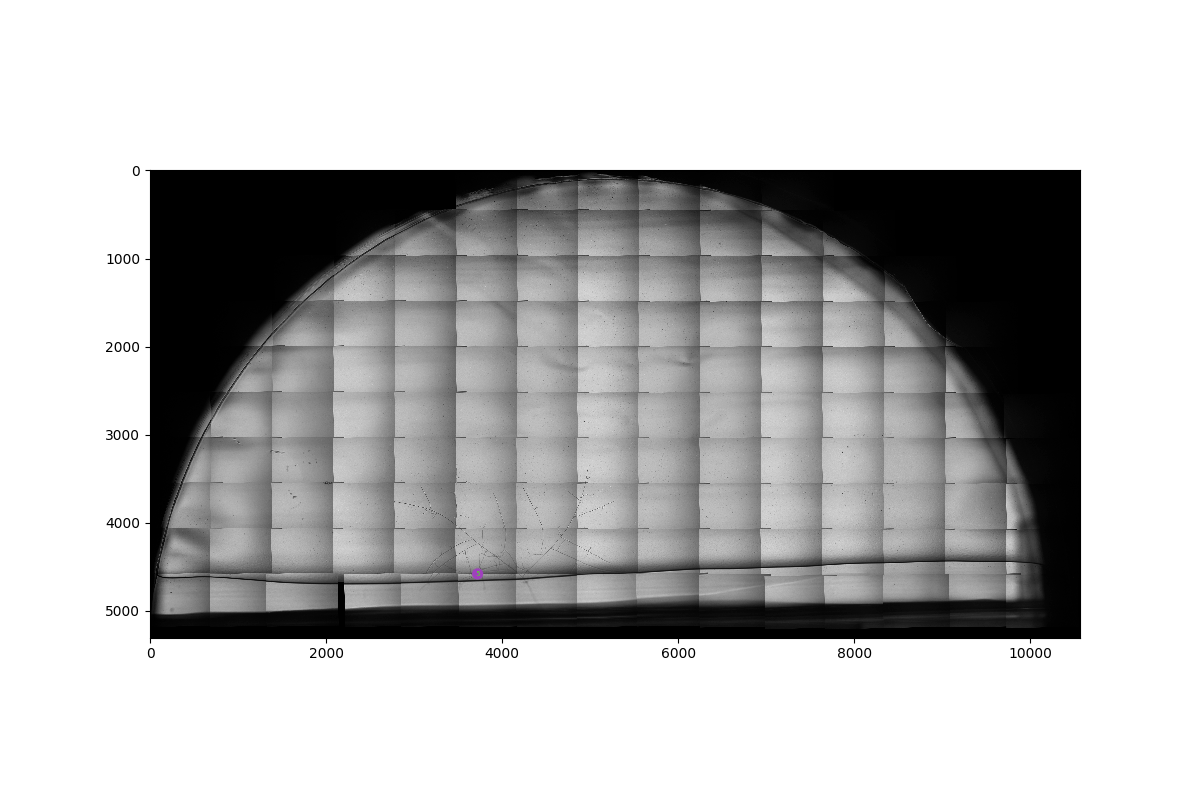

In [40]:
ax = plot_full(exp, 0, nodes=[hypha.end for hypha in hypha_select], dilation=20)

In [106]:
def get_min_distance_straigth_growth(pos, nodes_select, t, size=500):
    positions = np.array([node.pos(t) for node in nodes_select])
    distances = np.linalg.norm(positions - pos, axis=1) * 1.725
    return np.min(distances)

In [107]:
def get_distance_along_graph(exp, node1, node2, t):
    nodes = nx.shortest_path(
        exp.nx_graph[t],
        source=node1.label,
        target=node2.label,
        weight="weight",
    )
    edges = [
        Edge(
            exp.get_node(nodes[i]),
            exp.get_node(nodes[i + 1]),
            exp,
        )
        for i in range(len(nodes) - 1)
    ]
    lengths = np.array([measure_length_um_edge(edge, t) for edge in edges])
    tot_length_C = np.sum(lengths)
    return tot_length_C

In [108]:
def get_min_distance_along_graph(exp, pos, nodes_select, t, size=500):
    edge = find_nearest_edge(pos, exp, 0)
    distances = [
        get_distance_along_graph(exp, node, edge.end, t) for node in nodes_select
    ]
    return np.min(distances)

In [110]:
node_select = [hypha.end for hypha in hypha_select]

In [112]:
table

kymo_id  video_id  posx  posy    speed+   speed-  spore_density_2000  \
0         1         1  1853  4532  10.01000  -6.1656            0.012901   
1         2         1  1853  4532   7.11530  -6.3658            0.012901   
2         3         2  2115  4440   4.39720  -4.2113            0.023476   
3         4         2  2115  4440   5.35980  -4.6188            0.023476   
4         5         3  2240  4233   5.87280  -5.6744            0.046119   
5         6         3  2240  4233   7.76730  -4.5226            0.046119   
6         7         4  2307  4086   3.26910  -5.6461            0.040035   
7         8         4  2307  4086   2.81680  -5.7251            0.040035   
8         9         5  2498  3150   3.17860  -3.8326            0.010220   
9        10         5  2498  3150   2.75830  -6.3540            0.010220   
10       11         6  2775  2516   4.16510  -3.9968            0.007708   
11       12         6  2775  2516   0.41787  -2.9374            0.007708   
12       13         7  3092  1756   2.86570 -10.5450            0.000000   
13       14         7  3092  1756   6.31820  -3.2192            0.000000   
14       15         8  3363  1176   0.26446  -4.6935            0.000000   
15       16         9  3502   978   3.36230  -2.0232            0.000000   
16       17        10  4118   393   3.85570  -1.9590            0.000000   
17       19        11  2366  4165  10.68500  -2.8236            0.044666   
18       20        12  2709  3892   9.69880  -6.0315            0.028969   
19       21        12  2709  3892  11.38500 -10.7450            0.028969   
20       22        13  3195  3561   7.93740  -6.7721            0.009635   
21       23        13  3195  3561   4.37130  -8.9761            0.009635   
22       24        14  3662  3318   3.60680  -4.8472            0.008679   
23       25        14  3662  3318   5.19000  -7.1540            0.008679   
24       26        15  4868  3034   4.02630   0.0000            0.000000   
25       27        16  3315  4000   8.25260  -7.3031            0.011167   
26       28        16  3315  4000   9.40280  -5.4898            0.011167   
27       29        17  3782  3779   8.23780 -12.0370            0.012877   
28       30        18  4388  3504   6.61230  -8.3259            0.001710   
29       31        19  5088  3302   3.12670  -1.5559            0.000000   

    spore_density_1000  spore_density_500  
0             0.000000           0.000000  
1             0.000000           0.000000  
2             0.000000           0.000000  
3             0.000000           0.000000  
4             0.033068           0.000000  
5             0.033068           0.000000  
6             0.061630           0.000000  
7             0.061630           0.000000  
8             0.008316           0.024476  
9             0.008316           0.024476  
10            0.017604           0.000000  
11            0.017604           0.000000  
12            0.000000           0.000000  
13            0.000000           0.000000  
14            0.000000           0.000000  
15            0.000000           0.000000  
16            0.000000           0.000000  
17            0.049068           0.000000  
18            0.042903           0.171612  
19            0.042903           0.171612  
20            0.011772           0.000000  
21            0.011772           0.000000  
22            0.025453           0.053428  
23            0.025453           0.053428  
24            0.000000           0.000000  
25            0.000000           0.000000  
26            0.000000           0.000000  
27            0.000000           0.000000  
28            0.000000           0.000000  
29            0.000000           0.000000

In [114]:
# table = get_spore_volume_loc(table,exp,2000)
table["distance_growth_front_straight"] = [
    get_min_distance_straigth_growth(pos, node_select, 0) for pos in poss
]
table["distance_growth_front_along_graph"] = [
    get_min_distance_along_graph(exp, pos, node_select, 0) for pos in poss
]

In [115]:
table

kymo_id  video_id  posx  posy    speed+   speed-  spore_density_2000  \
0         1         1  1853  4532  10.01000  -6.1656            0.012901   
1         2         1  1853  4532   7.11530  -6.3658            0.012901   
2         3         2  2115  4440   4.39720  -4.2113            0.023476   
3         4         2  2115  4440   5.35980  -4.6188            0.023476   
4         5         3  2240  4233   5.87280  -5.6744            0.046119   
5         6         3  2240  4233   7.76730  -4.5226            0.046119   
6         7         4  2307  4086   3.26910  -5.6461            0.040035   
7         8         4  2307  4086   2.81680  -5.7251            0.040035   
8         9         5  2498  3150   3.17860  -3.8326            0.010220   
9        10         5  2498  3150   2.75830  -6.3540            0.010220   
10       11         6  2775  2516   4.16510  -3.9968            0.007708   
11       12         6  2775  2516   0.41787  -2.9374            0.007708   
12       13         7  3092  1756   2.86570 -10.5450            0.000000   
13       14         7  3092  1756   6.31820  -3.2192            0.000000   
14       15         8  3363  1176   0.26446  -4.6935            0.000000   
15       16         9  3502   978   3.36230  -2.0232            0.000000   
16       17        10  4118   393   3.85570  -1.9590            0.000000   
17       19        11  2366  4165  10.68500  -2.8236            0.044666   
18       20        12  2709  3892   9.69880  -6.0315            0.028969   
19       21        12  2709  3892  11.38500 -10.7450            0.028969   
20       22        13  3195  3561   7.93740  -6.7721            0.009635   
21       23        13  3195  3561   4.37130  -8.9761            0.009635   
22       24        14  3662  3318   3.60680  -4.8472            0.008679   
23       25        14  3662  3318   5.19000  -7.1540            0.008679   
24       26        15  4868  3034   4.02630   0.0000            0.000000   
25       27        16  3315  4000   8.25260  -7.3031            0.011167   
26       28        16  3315  4000   9.40280  -5.4898            0.011167   
27       29        17  3782  3779   8.23780 -12.0370            0.012877   
28       30        18  4388  3504   6.61230  -8.3259            0.001710   
29       31        19  5088  3302   3.12670  -1.5559            0.000000   

    spore_density_1000  spore_density_500  distance_growth_front_straight  \
0             0.000000           0.000000                    30374.063450   
1             0.000000           0.000000                    30374.063450   
2             0.000000           0.000000                    28475.915775   
3             0.000000           0.000000                    28475.915775   
4             0.033068           0.000000                    26390.356918   
5             0.033068           0.000000                    26390.356918   
6             0.061630           0.000000                    25008.487659   
7             0.061630           0.000000                    25008.487659   
8             0.008316           0.024476                    17532.442417   
9             0.008316           0.024476                    17532.442417   
10            0.017604           0.000000                    11997.507081   
11            0.017604           0.000000                    11997.507081   
12            0.000000           0.000000                     6598.488031   
13            0.000000           0.000000                     6598.488031   
14            0.000000           0.000000                     5713.115979   
15            0.000000           0.000000                     6351.140334   
16            0.000000           0.000000                      929.669548   
17            0.049068           0.000000                    25328.150123   
18            0.042903           0.171612                    21846.107107   
19            0.042903           0.171612                    21846.107107   
20            0.011772        

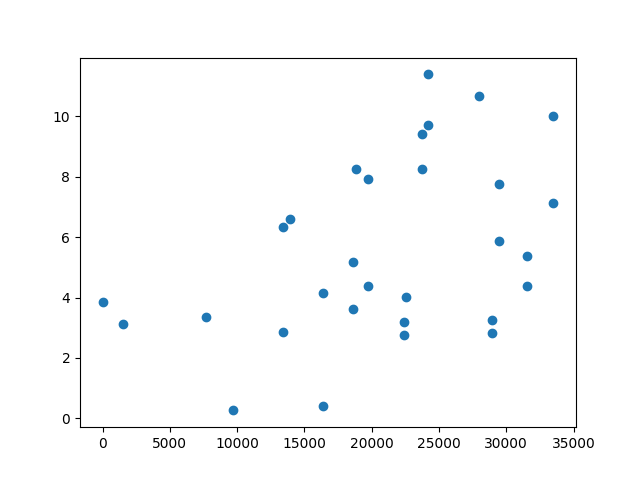

In [116]:
fig, ax = plt.subplots()
ax.scatter(table["distance_growth_front_along_graph"], table["speed+"])

In [50]:
t = 0
edges = get_all_edges(exp, t)

In [54]:
edges_select = [
    edge
    for edge in edges
    if np.linalg.norm(edge.begin.pos(0) - np.array([7609, 17603])) <= 3000
]

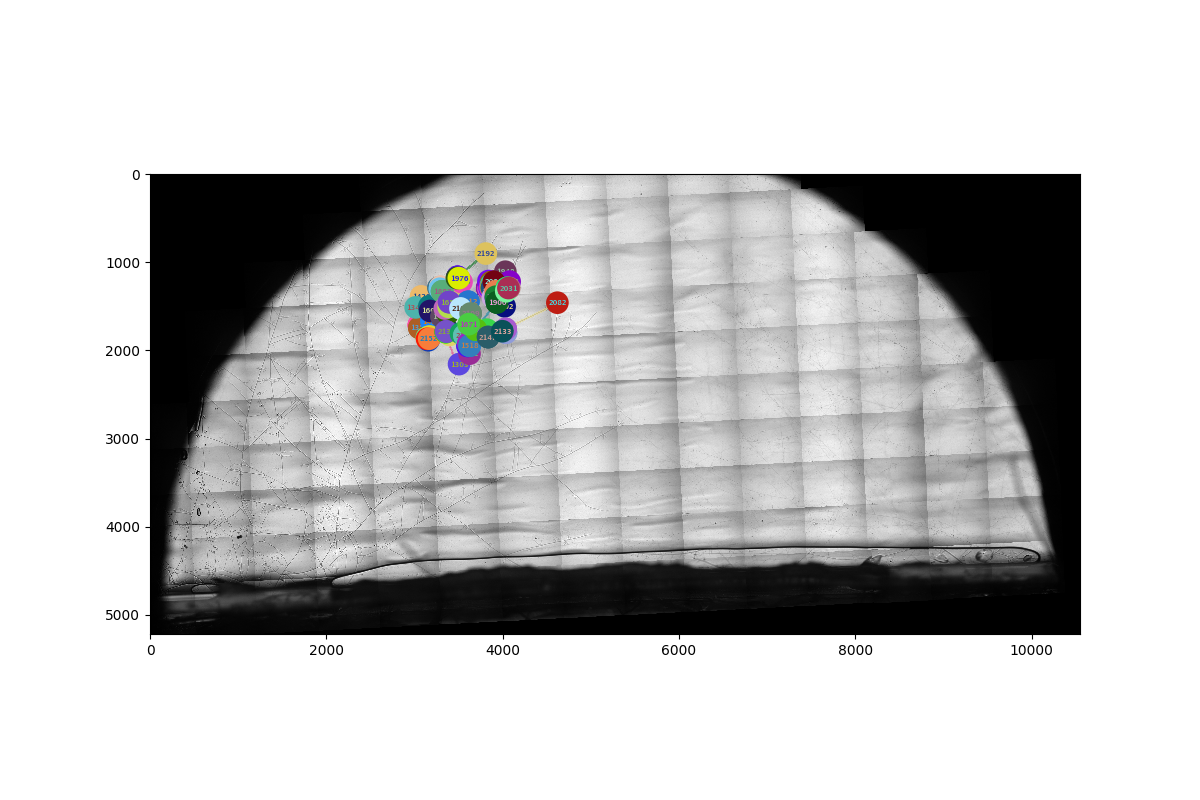

In [58]:
ax = plot_full(
    exp,
    0,
    edges=edges_select,
    nodes=[edge.end for edge in edges_select] + [edge.begin for edge in edges_select],
    dilation=20,
)

In [65]:
int(measure_length_um_edge(edge, 0) / 1000) + 1

1

In [72]:
edge = edges[0]
resist = []
for edge in edges_select:
    if edge.begin.degree(t) == 1:
        resistor = f"R_{edge.end.label}_{edge.begin.label} {edge.end.label} {edge.begin.label}; rotate={180+90-int(edge.orientation_whole(t))}, size={int(measure_length_um_edge(edge,0)/1000)+1}, scale = 1, ground"
    elif edge.end.degree(t) == 1:
        resistor = f"R_{edge.begin.label}_{edge.end.label} {edge.begin.label} {edge.end.label}; rotate={90-int(edge.orientation_whole(t))}, size={int(measure_length_um_edge(edge,0)/1000)+1}, scale = 1, ground"
    else:
        resistor = f"R_{edge.begin.label}_{edge.end.label} {edge.begin.label} {edge.end.label}; rotate={90-int(edge.orientation_whole(t))}, size={int(measure_length_um_edge(edge,0)/1000)+1}, scale = 1"
    resist.append(resistor)
" \n ".join(resist)

'R_1420_1435 1420 1435; rotate=265, size=4, scale = 1 \n R_1420_1691 1420 1691; rotate=27, size=2, scale = 1 \n R_1355_1435 1355 1435; rotate=99, size=1, scale = 1 \n R_1355_1429 1355 1429; rotate=29, size=2, scale = 1 \n R_2143_2146 2143 2146; rotate=259, size=1, scale = 1 \n R_2143_2136 2143 2136; rotate=9, size=2, scale = 1 \n R_1435_1346 1435 1346; rotate=101, size=2, scale = 1, ground \n R_1429_1605 1429 1605; rotate=98, size=2, scale = 1 \n R_1429_1300 1429 1300; rotate=25, size=2, scale = 1 \n R_1691_1879 1691 1879; rotate=29, size=1, scale = 1 \n R_1691_1882 1691 1882; rotate=-36, size=1, scale = 1 \n R_2146_2150 2146 2150; rotate=202, size=1, scale = 1, ground \n R_2146_2152 2146 2152; rotate=259, size=1, scale = 1 \n R_2152_2153 2152 2153; rotate=185, size=1, scale = 1, ground \n R_2152_2155 2152 2155; rotate=244, size=1, scale = 1, ground \n R_1605_1424 1605 1424; rotate=99, size=1, scale = 1, ground \n R_1605_1603 1605 1603; rotate=31, size=1, scale = 1, ground \n R_1300_15